In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv'); df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.isnull().sum()/df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

##결측치 비율에 따른 대응
1. 10% 미만일 때

줄 삭제하거나 다른값 대입

평균(이상치가 거의 없을 때)

중앙값(이상치가 존재할 때)

결측치 예측 대입
2. 10% 이상일 때

다른 값을 대입한다

3. 75% 이상 결측치

해당 칸 삭제

다른 값 대입

## 데이터 프레임(한달 용돈 - 단위 만원)

In [8]:
df = pd.DataFrame({
    'pocket_money':[30, 10, 50, 100, 200]
})

In [9]:
df

,pocket_money
0,30
1,10
2,50
3,100
4,200


이상치가 없을 때는 평균과 중앙값이 비슷하다!

In [10]:
df.mean()

pocket_money    78.0
dtype: float64

In [11]:
df.median()

pocket_money    50.0
dtype: float64

이상치(잘못된 입력 또는 95%에 해당하지 않는 데이터) 추가

워렌버핏 용돈 (50억)


In [12]:
df.loc[5, "pocket_money"] = 500000

In [13]:
df

,pocket_money
0,30.0
1,10.0
2,50.0
3,100.0
4,200.0
5,500000.0


In [14]:
df.mean()

pocket_money    83398.333333
dtype: float64

In [15]:
df.median()

pocket_money    75.0
dtype: float64

In [16]:
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


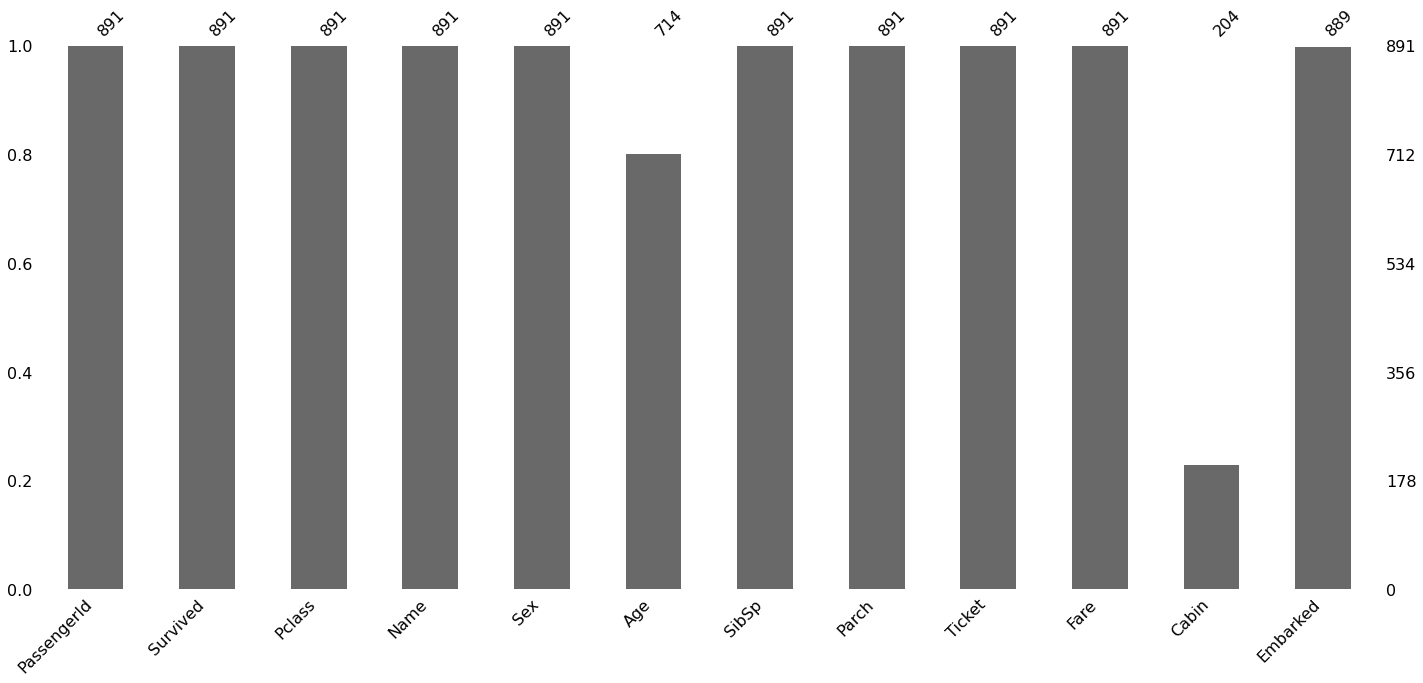

In [17]:
msno.bar(df_train)

## PClass 칼럼과 관계

In [18]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [20]:
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
df_train[df_train['Survived']==1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## Sex 칼럼과 관계

In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


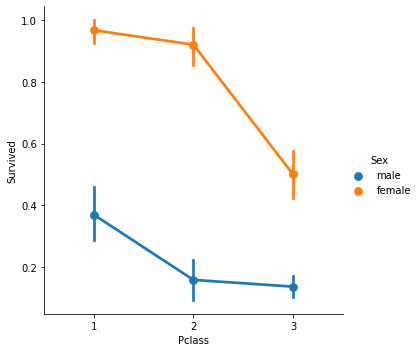

In [24]:
import seaborn as sns
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train)

## Age 칼럼과 관계

In [25]:
survived_age = df_train['Age'][df_train['Survived'] == 1]; survived_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [26]:
dead_age = df_train['Age'][df_train['Survived'] == 0]; dead_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

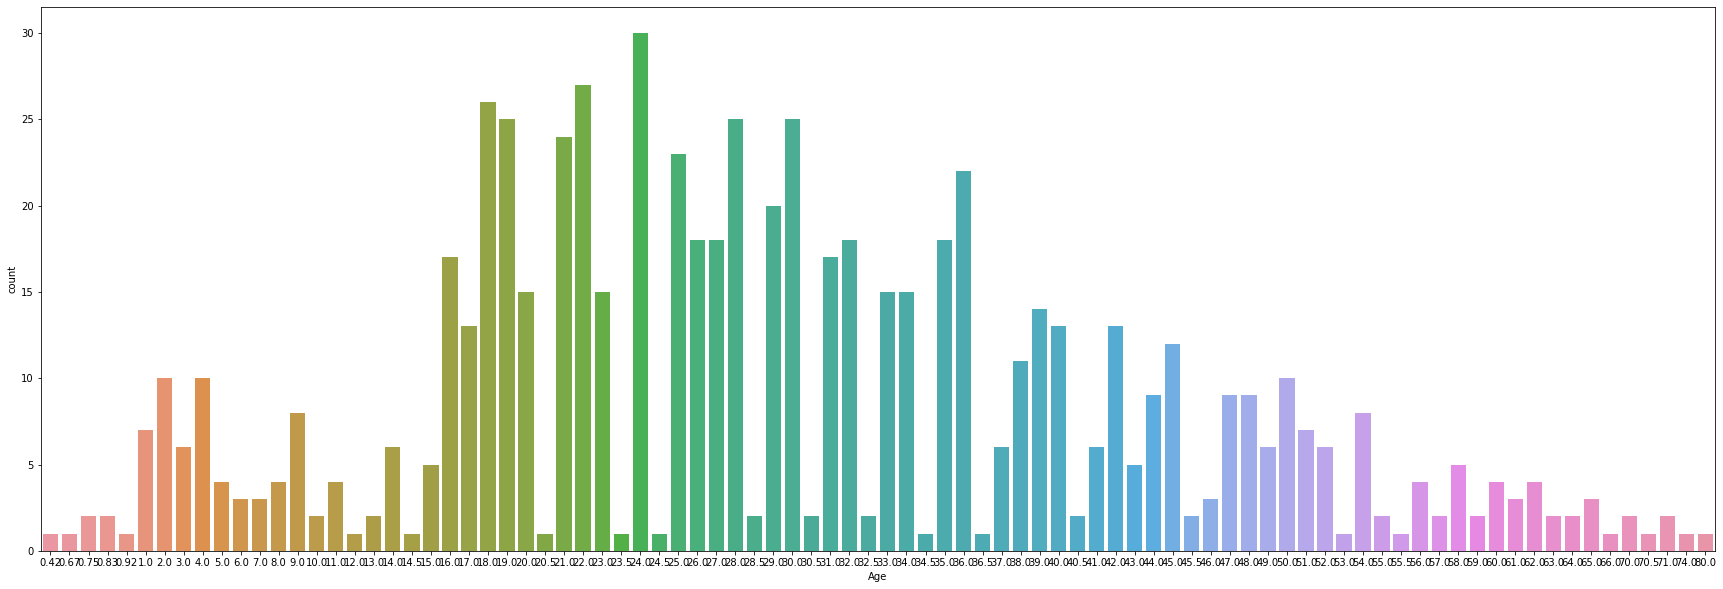

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Age', data = df_train)

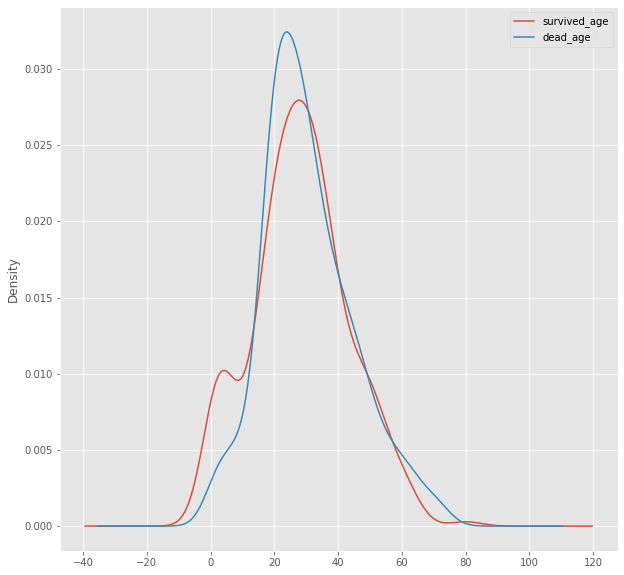

In [29]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 10))
survived_age.plot(kind = 'kde')
dead_age.plot(kind = 'kde')
plt.legend(['survived_age', 'dead_age'])

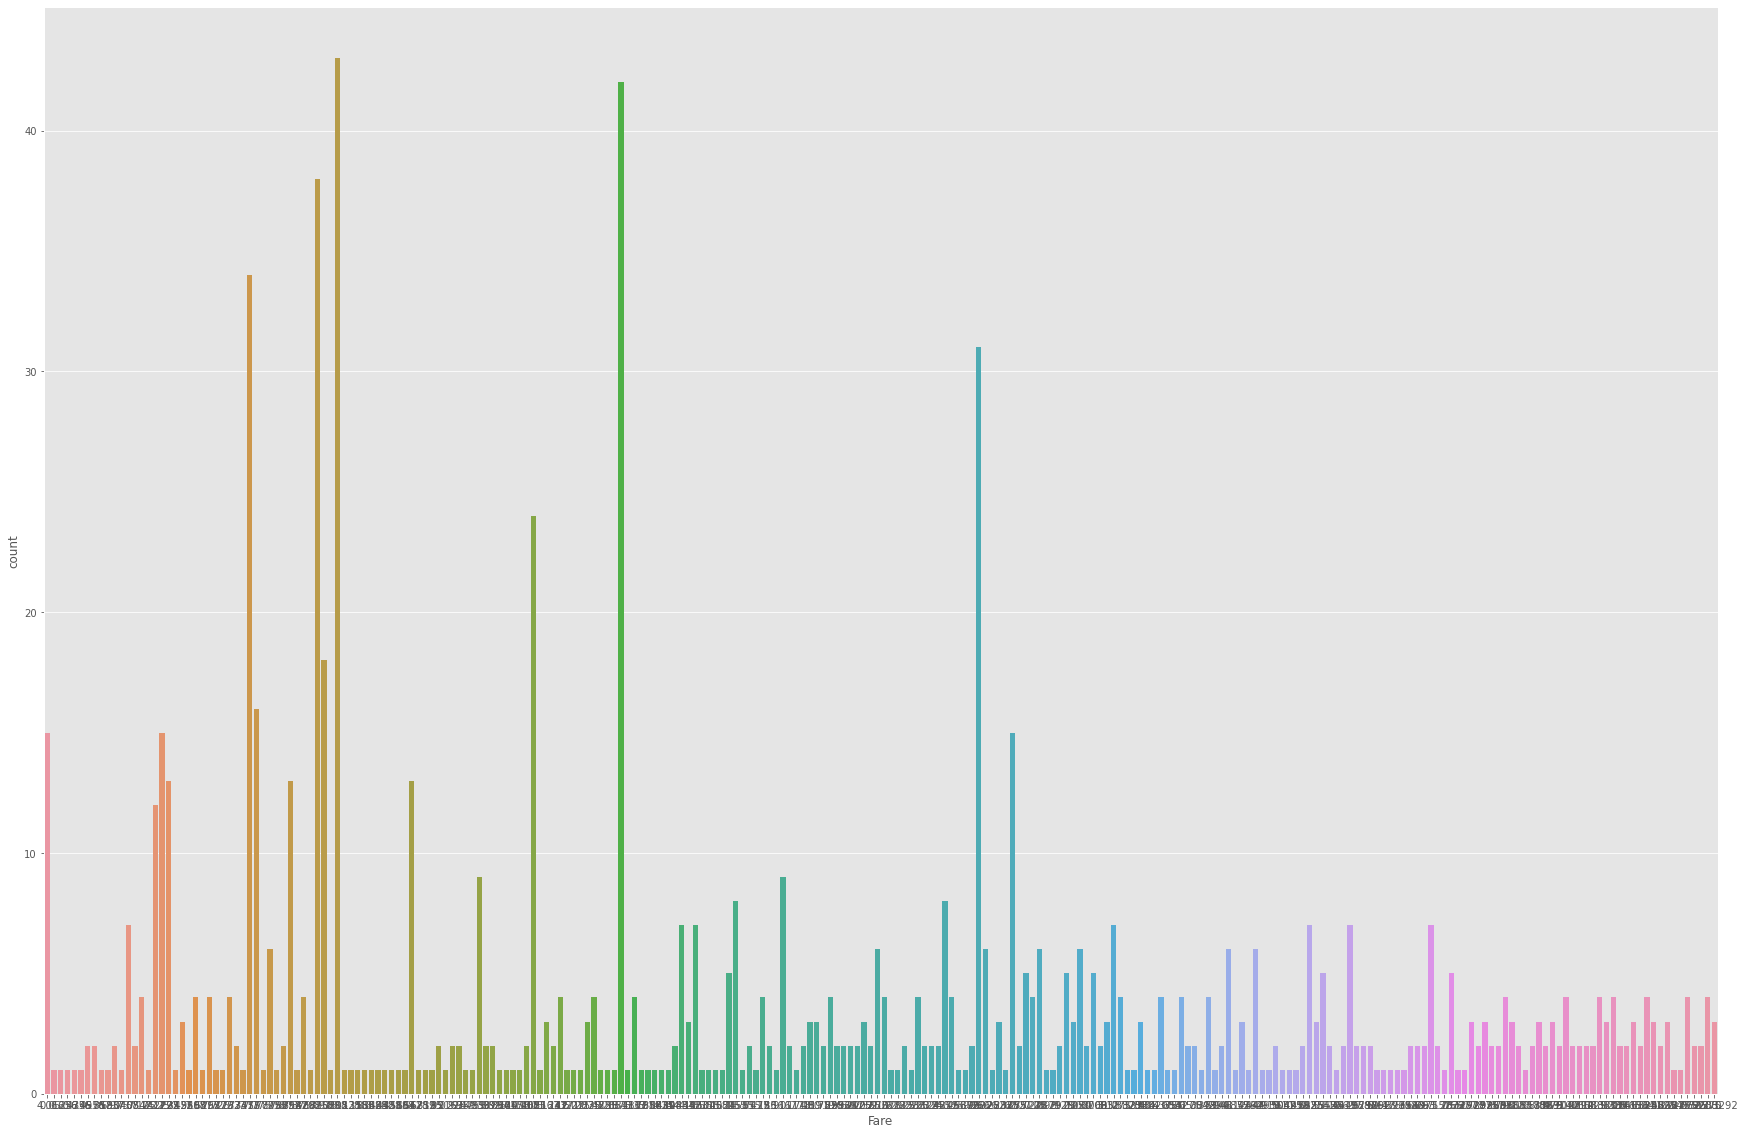

In [30]:
plt.figure(figsize=(30,20))
sns.countplot(x = 'Fare', data = df_train)

## Embarked와 관계

In [31]:
pd.crosstab(df_train['Embarked'], df_train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [32]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'], margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


## 컬럼의 기울어짐 판단

In [33]:
# 기울임 점포확인
# 4이상 기울어졌다고 판단
df_train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

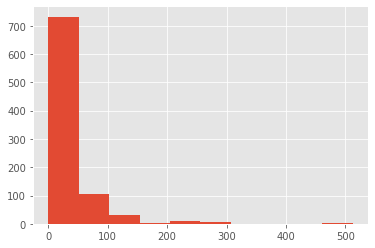

In [34]:
plt.hist(df_train['Fare'])

(array([89., 89., 89., 89., 89., 89., 89., 89., 89., 90.]),
 array([  1.,  90., 179., 268., 357., 446., 535., 624., 713., 802., 891.]),
 <a list of 10 Patch objects>)

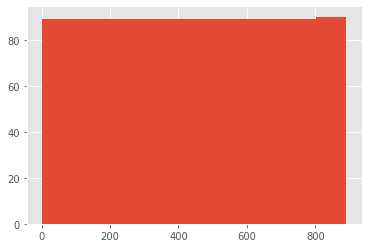

In [35]:
plt.hist(df_train['PassengerId'])

In [36]:
import numpy as np

In [37]:
df_train['Fare'] = np.log1p(df_train['Fare'])

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

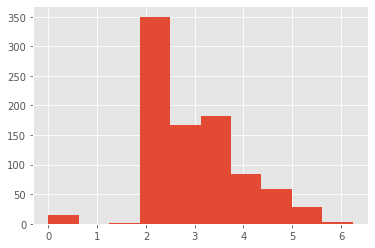

In [38]:
plt.hist(df_train['Fare'])

# 전처리

### 가족 수 칼럼

In [39]:
df_train['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [40]:
df_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [41]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1; df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [42]:
pd.crosstab(df_train['FamilySize'], df_train['Survived'], margins = True)

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


In [43]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [44]:
import re
p = re.compile('Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady')

In [45]:
name_list = df_train['Name'].tolist()

In [46]:
for name in name_list:
  print('name :', name)
  print(p.search(name))
  if p.search(name)!=None:
    print(p.search(name)[0])
  else:
    print("@@@@@@@@@@@@@@@뭐야 이거 인성문제있어? @@@@@@@@@@@@@@@")
    print('없음')
    print("@@@@@@@@@@@@@@@뭐야 이거 인성문제있어? @@@@@@@@@@@@@@@")
  print('*'*100)

name : Braund, Mr. Owen Harris
<_sre.SRE_Match object; span=(8, 10), match='Mr'>
Mr
****************************************************************************************************
name : Cumings, Mrs. John Bradley (Florence Briggs Thayer)
<_sre.SRE_Match object; span=(9, 12), match='Mrs'>
Mrs
****************************************************************************************************
name : Heikkinen, Miss. Laina
<_sre.SRE_Match object; span=(11, 15), match='Miss'>
Miss
****************************************************************************************************
name : Futrelle, Mrs. Jacques Heath (Lily May Peel)
<_sre.SRE_Match object; span=(10, 13), match='Mrs'>
Mrs
****************************************************************************************************
name : Allen, Mr. William Henry
<_sre.SRE_Match object; span=(7, 9), match='Mr'>
Mr
****************************************************************************************************
name : Moran, Mr.

In [47]:
sir = []
for name in name_list:
  if p.search(name) != None:
    if p.search(name)[0] in ['Countess', 'Lady', 'Mrs']:
      sir.append("Mrs")
    elif p.search(name)[0] in ['Mme', 'Ms', 'Mlle']:
      sir.append('Miss')
    elif p.search(name)[0] in ['Don', 'Dr', 'Major']:
      sir.append('Mr')
    else:
      sir.append(p.search(name)[0])
  else:
    sir.append('Other')

In [48]:
sir

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr

In [49]:
pd.Series(sir)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Length: 891, dtype: object

In [50]:
pd.Series(sir).value_counts()

Mr        530
Miss      185
Mrs       126
Master     40
Other      10
dtype: int64

In [51]:
df_train['Sir'] = pd.Series(sir)

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,1,Mr


In [53]:
pd.crosstab(df_train['Sir'], df_train['Survived'], margins = True)

Survived,0,1,All
Sir,,,
Master,17,23,40
Miss,55,130,185
Mr,442,88,530
Mrs,26,100,126
Other,9,1,10
All,549,342,891


### 나이 결측치 처리

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Sir          891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [55]:
df_train['Age'].mean()

29.69911764705882

In [56]:
group = df_train.groupby('Sir')

In [57]:
for g in group:
  print(g)

('Master',      PassengerId  Survived  Pclass  ... Embarked FamilySize     Sir
7              8         0       3  ...        S          5  Master
16            17         0       3  ...        Q          6  Master
50            51         0       3  ...        S          6  Master
59            60         0       3  ...        S          8  Master
63            64         0       3  ...        S          6  Master
65            66         1       3  ...        C          3  Master
78            79         1       2  ...        S          3  Master
125          126         1       3  ...        C          2  Master
159          160         0       3  ...        S         11  Master
164          165         0       3  ...        S          6  Master
165          166         1       3  ...        S          3  Master
171          172         0       3  ...        Q          6  Master
176          177         0       3  ...        S          5  Master
182          183         0       3  .

In [58]:
for sir, g in group:
  print('Sir : {}\n***mean()***\n{}'.format(sir, g.mean()))

Sir : Master
***mean()***
PassengerId    414.975000
Survived         0.575000
Pclass           2.625000
Age              4.574167
SibSp            2.300000
Parch            1.375000
Fare             3.381361
FamilySize       4.675000
dtype: float64
Sir : Miss
***mean()***
PassengerId    413.708108
Survived         0.702703
Pclass           2.281081
Age             21.860000
SibSp            0.702703
Parch            0.540541
Fare             3.192351
FamilySize       2.243243
dtype: float64
Sir : Mr
***mean()***
PassengerId    454.490566
Survived         0.166038
Pclass           2.384906
Age             32.651589
SibSp            0.292453
Parch            0.150943
Fare             2.728141
FamilySize       1.443396
dtype: float64
Sir : Mrs
***mean()***
PassengerId    456.706349
Survived         0.793651
Pclass           1.984127
Age             36.000000
SibSp            0.690476
Parch            0.817460
Fare             3.485083
FamilySize       2.507937
dtype: float64
Sir : Other
*

In [59]:
group.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Sir,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.381361,4.675000
Miss,413.708108,0.702703,2.281081,21.860000,0.702703,0.540541,3.192351,2.243243
Mr,454.490566,0.166038,2.384906,32.651589,0.292453,0.150943,2.728141,1.443396
Mrs,456.706349,0.793651,1.984127,36.000000,0.690476,0.817460,3.485083,2.507937
Other,582.600000,0.100000,1.600000,48.300000,0.200000,0.200000,2.848635,1.400000


In [60]:
group.mean()['Age'] # 나이의 빈칸을 이 값을 넣을 예정

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [61]:
df_train.groupby('Sir').mean()['Age']

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [62]:
df_train.groupby('Sir').mean()['Age'].loc['Mr']

32.65158924205379

In [63]:
df_train.groupby('Sir').mean().loc['Mrs']['Age']

36.0

In [64]:
sir_df = df_train.groupby('Sir').mean()

In [65]:
df_train[df_train['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [66]:
age_null_index = df_train.index[df_train['Age'].isnull()] # 나이값이 결측치인 사람들의 index를 저장

In [67]:
age_null_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [68]:
age_null_index[0]

5

In [69]:
index = age_null_index[0]

In [70]:
index

5

In [71]:
df = df_train

In [72]:
df.loc[index]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                    2.24689
Cabin                       NaN
Embarked                      Q
FamilySize                    1
Sir                          Mr
Name: 5, dtype: object

In [73]:
df.loc[index]['Sir']

'Mr'

In [74]:
sir_df.loc[df.loc[index]['Sir']]

PassengerId    454.490566
Survived         0.166038
Pclass           2.384906
Age             32.651589
SibSp            0.292453
Parch            0.150943
Fare             2.728141
FamilySize       1.443396
Name: Mr, dtype: float64

In [75]:
sir_df.loc[df.loc[index]['Sir']]['Age']

32.65158924205379

In [76]:
df.at[index, 'Age'] = sir_df.loc[df.loc[index]['Sir']]['Age'] # DataFrame.at을 쓰면 []에 행, 열 인덱스를 넣어도 되고 변수 이름을 넣어도 됨

In [77]:
df_train.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                     32.6516
SibSp                         0
Parch                         0
Ticket                   330877
Fare                    2.24689
Cabin                       NaN
Embarked                      Q
FamilySize                    1
Sir                          Mr
Name: 5, dtype: object

In [78]:
for index in age_null_index:
  print('index :', index)
  df = df_train
  print('df.loc[index][Sir] :', df.loc[index]['Sir'])
  row_sir = df.loc[index]['Sir']
  print('sir_df.loc[{}]= {:.0f}'.format(row_sir, sir_df.loc[row_sir]['Age']))
  df.at[index, 'Age'] = sir_df.loc[row_sir]['Age']
  print('='*30)

index : 5
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 17
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 19
df.loc[index][Sir] : Mrs
sir_df.loc[Mrs]= 36
index : 26
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 28
df.loc[index][Sir] : Miss
sir_df.loc[Miss]= 22
index : 29
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 31
df.loc[index][Sir] : Mrs
sir_df.loc[Mrs]= 36
index : 32
df.loc[index][Sir] : Miss
sir_df.loc[Miss]= 22
index : 36
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 42
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 45
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 46
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 47
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 48
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 55
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 64
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 65
df.loc[index][Sir] : Master
sir_df.loc[Master]= 5
index : 76
df.loc[index][Sir] : Mr
sir_df.loc[Mr]= 33
index : 77

In [79]:
df_train.loc[888]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                               21.86
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                            3.19663
Cabin                                               NaN
Embarked                                              S
FamilySize                                            4
Sir                                                Miss
Name: 888, dtype: object

### Embarked 결측치 처리

In [80]:
sum(df_train['Embarked'].isnull()) # 결측치 2개 밖에 없음!!!

2

In [81]:
df_train['Embarked'].value_counts() # s가 최빈값

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
df_train['Embarked'].fillna('S',inplace = True) # null 값에 s를 넣어줌

In [83]:
df_train['Embarked'].isnull().sum()

0

### 범주형 데이터 처리

#### sir 데이터 처리

In [84]:
df_train['Sir'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [85]:
enumerate(df_train['Sir'].unique())

In [86]:
list(enumerate(df_train['Sir'].unique()))

[(0, 'Mr'), (1, 'Mrs'), (2, 'Miss'), (3, 'Master'), (4, 'Other')]

In [87]:
for data in enumerate(df_train['Sir'].unique()):
  print("data :", data)
  print('data[0] :', data[0])
  print('data[1] :', data[1])

data : (0, 'Mr')
data[0] : 0
data[1] : Mr
data : (1, 'Mrs')
data[0] : 1
data[1] : Mrs
data : (2, 'Miss')
data[0] : 2
data[1] : Miss
data : (3, 'Master')
data[0] : 3
data[1] : Master
data : (4, 'Other')
data[0] : 4
data[1] : Other


In [88]:
df01 = df_train.copy()

In [89]:
df01['Sir'].replace('Mr', 0, inplace = True)

In [90]:
df01['Sir'].replace('Mrs', 1, inplace = True)

In [91]:
df01['Sir'].replace('Miss', 2, inplace = True)

In [92]:
df01['Sir'].replace('Master', 3, inplace = True)

In [93]:
df01['Sir'].replace('Other', 4, inplace= True)

In [94]:
df01

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,2.110213,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,4.280593,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,2.188856,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,3.990834,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,2.202765,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,2.639057,NaN,S,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,3.433987,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.86,1,2,W./C. 6607,3.196630,NaN,S,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,3.433987,C148,C,1,0


In [95]:
for data in enumerate(df_train['Sir'].unique()):
  df_train['Sir'].replace(data[1], data[0], inplace=True)

In [96]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,2.110213,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,4.280593,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,2.188856,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,3.990834,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,2.202765,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,2.639057,NaN,S,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,3.433987,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.86,1,2,W./C. 6607,3.196630,NaN,S,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,3.433987,C148,C,1,0


In [97]:
df_train['Sir']

0      0
1      1
2      2
3      1
4      0
      ..
886    4
887    2
888    2
889    0
890    0
Name: Sir, Length: 891, dtype: int64

#### Embarked 데이터 처리

In [98]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [99]:
for data in enumerate(df_train['Embarked'].unique()):
  df_train['Embarked'].replace(data[1], data[0], inplace=True)

In [100]:
df_train['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

#### sex 데이터 처리

In [101]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [102]:
for data in enumerate(df_train['Sex'].unique()):
  df_train['Sex'].replace(data[1], data[0], inplace = True)

In [103]:
df_train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

#### Age 데이터 처리

In [104]:
df_train['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.86
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [106]:
df_train['Age'].sort_values()

803     0.42
755     0.67
644     0.75
469     0.75
831     0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: Age, Length: 891, dtype: float64

In [110]:
df_train['Age'].sort_values()//10

803    0.0
755    0.0
644    0.0
469    0.0
831    0.0
      ... 
116    7.0
493    7.0
96     7.0
851    7.0
630    8.0
Name: Age, Length: 891, dtype: float64

In [133]:
df_train['Age_cat'] = df_train['Age'].apply(lambda x : x//10)

In [134]:
df_train['Age_cat']

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    1.0
888    2.0
889    2.0
890    3.0
Name: Age_cat, Length: 891, dtype: float64

#### 칼럼 삭제

In [137]:
df_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'Age'], axis = 1, inplace = True); df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,Sir,Age_cat
0,0,3,0,1,0,2.110213,0,2,0,2.0
1,1,1,1,1,0,4.280593,1,2,1,3.0
2,1,3,1,0,0,2.188856,0,1,2,2.0
3,1,1,1,1,0,3.990834,0,2,1,3.0
4,0,3,0,0,0,2.202765,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,2.639057,0,1,4,2.0
887,1,1,1,0,0,3.433987,0,1,2,1.0
888,0,3,1,1,2,3.196630,0,4,2,2.0
889,1,1,0,0,0,3.433987,1,1,0,2.0


In [142]:
df = pd.DataFrame({
    'A':[9]*90 + [1] *10
})

In [143]:
df

,A
0,9
1,9
2,9
3,9
4,9
...,...
95,1
96,1
97,1
98,1


In [144]:
df.mean()

A    8.2
dtype: float64

In [145]:
df.std()

A    2.412091
dtype: float64

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 90.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

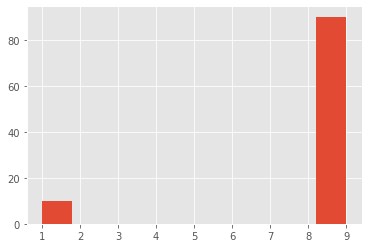

In [146]:
plt.hist(df['A'])

In [147]:
df.skew() # 절대값이 4이상 되어야 유의미

A   -2.707449
dtype: float64

In [148]:
df = pd.DataFrame({
    'A':[9]*900 + [1]*10 + [5] * 10
})

In [149]:
df.skew() # 기울임 정도가 유의미

A   -7.539095
dtype: float64

(array([ 10.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0., 900.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

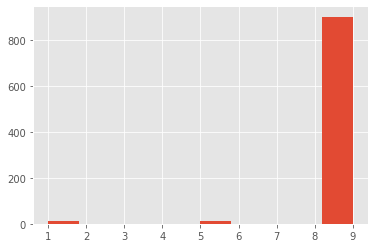

In [150]:
plt.hist(df['A'])

In [151]:
import numpy as np

In [152]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [153]:
np.log(1)

0.0

In [155]:
np.log1p(df['A']) # 데이터가 항상 0이상으로 만들기 위해서 log1p를 사용

0      2.302585
1      2.302585
2      2.302585
3      2.302585
4      2.302585
         ...   
915    1.791759
916    1.791759
917    1.791759
918    1.791759
919    1.791759
Name: A, Length: 920, dtype: float64

(array([ 10.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0., 900.]),
 array([0.69314718, 0.85409097, 1.01503476, 1.17597855, 1.33692235,
        1.49786614, 1.65880993, 1.81975372, 1.98069751, 2.1416413 ,
        2.30258509]),
 <a list of 10 Patch objects>)

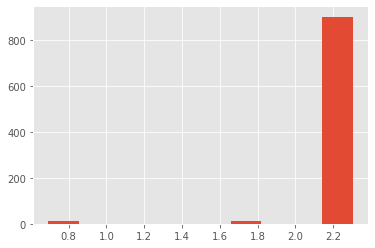

In [157]:
plt.hist(np.log1p(df['A'])) # 기울임 정도를 해결하기 위해서 log1p함수를 사용

In [158]:
df.std()

A    0.92384
dtype: float64

# 분류

In [159]:
y_label = df_train['Survived']
df_train.drop('Survived', axis = 1, inplace = True)

In [160]:
y_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [161]:
df_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,Sir,Age_cat
0,3,0,1,0,2.110213,0,2,0,2.0
1,1,1,1,0,4.280593,1,2,1,3.0
2,3,1,0,0,2.188856,0,1,2,2.0
3,1,1,1,0,3.990834,0,2,1,3.0
4,3,0,0,0,2.202765,0,1,0,3.0


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y_label, random_state = 156)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

In [164]:
dt_clf = DecisionTreeClassifier()

In [165]:
dt_clf = dt_clf.fit(X_train, y_train)

In [166]:
dt_prediction = dt_clf.predict(X_test)

In [167]:
dt_prediction

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [168]:
y_test

748    0
847    0
760    0
35     0
871    1
      ..
476    0
175    0
379    0
371    0
178    0
Name: Survived, Length: 223, dtype: int64

In [169]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction)
print('정확도 :', accuracy)

정확도 : 0.8251121076233184


In [170]:
feature_names = df_train.columns.tolist()
feature_names

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'FamilySize',
 'Sir',
 'Age_cat']

In [171]:
target_name = np.array(['Dead', 'Survived'])
target_name

array(['Dead', 'Survived'], dtype='<U8')

In [174]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [175]:
import pydotplus

In [176]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [177]:
Image(dt_graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [178]:
dt_graph.write_pdf('titanic.pdf')

True

In [181]:
new_data01 = np.array([[1, 0, 1, 2, 70, 1, 3, 0, 4.0]])

In [182]:
dt_clf.predict(new_data01)

array([1])

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
import numpy as np

In [184]:
rf_clf = RandomForestClassifier()

In [185]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
pred = rf_clf.predict(X_test); pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [187]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {}'.format(accuracy))

랜덤 포레스트 정확도 : 0.8565022421524664


In [188]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {'max_depth':[5, 7, 9, 11], 'min_child_weight':[1, 3, 5, 7], 'colsample_bytree':[0.5, 0.75, 1.0]}

gridcv = GridSearchCV(xgb_clf, param_grid = params)

In [189]:
import time
start = time.time()
gridcv.fit(X_train, y_train, early_stopping_rounds = 30,
           eval_metric = 'error',
           eval_set = [(X_train, y_train), (X_test, y_test)])
print('걸린 시간 : {:.0f}'.format(time.time() - start))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[39]	validation_0-error:0.116766	validation_1-error:0.152466

[0]	validation_0-error:0.172156	validation_1-error:0.183857
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.172156	validation_1-error:0.183857
[2]	validation_0-error:0.172156	validation_1-error:0.183857
[3]	validation_0-error:0.164671	validation_1-error:0.201794
[4]	validation_0-error:0.164671	validation_1-error:0.201794
[5]	validation_0-error:0.149701	validation_1-error:0.183857
[6]	validation_0-error:0.149701	validation_1-error:0.179372
[7]	validation_0-error:0.146707	validation_1-error:0.179372
[8]	validation_0-error:0.148204	validation_1-error:0.174888
[9]	validation_0-error:0.14521	validation_1-error:0.174888
[10]	validation_0-error:0.142216	validation_1-error:0.170404
[11]	validation_0-error:0.142216	validation_1-error:0.170404
[12]	validation_0-er

In [191]:
print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

GridSearchCV 최적 파라미터 : {'colsample_bytree': 1.0, 'max_depth': 7, 'min_child_weight': 3}


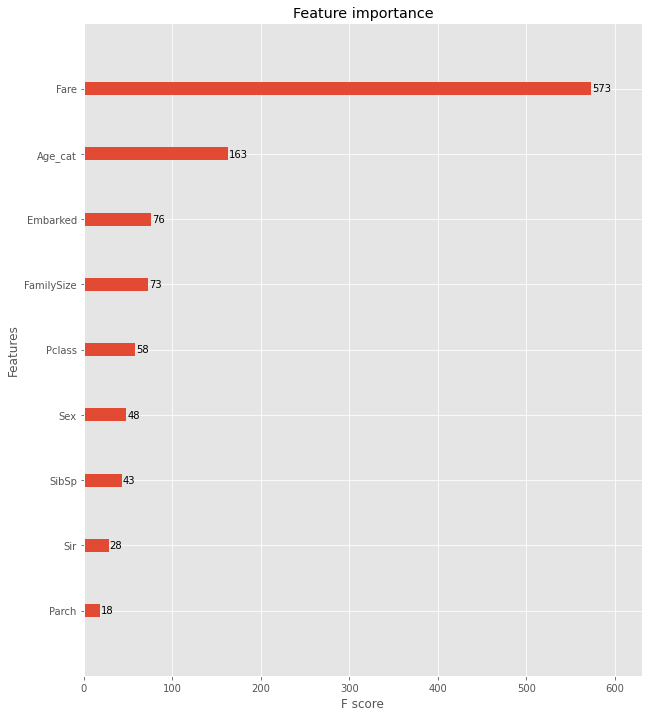

In [198]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10, 12))
# 어떤 칼럼이 예측에 중요한지 점수 출력
plot_importance(gridcv.best_estimator_, ax = ax)

In [199]:
pred = gridcv.predict(X_test); pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
# 오차 행렬을 구해서 출력
confusion = confusion_matrix(y_test, pred); confusion

array([[125,  12],
       [ 17,  69]])

In [201]:
accuracy = accuracy_score(y_test, pred); accuracy

0.8699551569506726